<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-are-the-probable-sites-of-prenyl-attachment-of-non-conventional-protein-prenylation-events?" data-toc-modified-id="What-are-the-probable-sites-of-prenyl-attachment-of-non-conventional-protein-prenylation-events?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What are the probable sites of prenyl attachment of non-conventional protein prenylation events?</a></span><ul class="toc-item"><li><span><a href="#Annotate-secondary-structure-of-cysteines" data-toc-modified-id="Annotate-secondary-structure-of-cysteines-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Annotate secondary structure of cysteines</a></span></li><li><span><a href="#Search-for-most-accessible-cysteines" data-toc-modified-id="Search-for-most-accessible-cysteines-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Search for most accessible cysteines</a></span></li></ul></li><li><span><a href="#SequenceLogos-for-internally-prenylated-proteins-with-1-most-accessible-cysteine" data-toc-modified-id="SequenceLogos-for-internally-prenylated-proteins-with-1-most-accessible-cysteine-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SequenceLogos for internally prenylated proteins with 1 most accessible cysteine</a></span><ul class="toc-item"><li><span><a href="#Sorted-by-accessibility" data-toc-modified-id="Sorted-by-accessibility-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sorted by accessibility</a></span></li><li><span><a href="#Sorted-by-moiety" data-toc-modified-id="Sorted-by-moiety-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sorted by moiety</a></span></li><li><span><a href="#Sorted-by-secondary-structure" data-toc-modified-id="Sorted-by-secondary-structure-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sorted by secondary structure</a></span></li><li><span><a href="#Hypergeometric-distribution-and-Fisher's-exact-test" data-toc-modified-id="Hypergeometric-distribution-and-Fisher's-exact-test-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Hypergeometric distribution and Fisher's exact test</a></span></li></ul></li><li><span><a href="#Search-for-double-prenylated-cysteines" data-toc-modified-id="Search-for-double-prenylated-cysteines-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Search for double prenylated cysteines</a></span></li></ul></div>

In [1]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [2]:
import pandas as pd
from functions import clean_agg
from functions import annotate_most_accs_C
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Display session information
session_info.show()

In [4]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
# Load data
datafolder = 'data'
PSSMSearch = 'data\PSSMSearch'
Foldseek = 'data\Foldseek'

# Background proteins
back_internal = pd.read_csv(os.path.join(datafolder, 'total_extracts_GG_F', 'clean_background.csv'), sep=',')

# What are the probable sites of prenyl attachment of non-conventional protein prenylation events?

Mapping of the cysteine sequence motifs onto the protein 3D structure 

In [6]:
print('Background proteins: ', len(back_internal['ID'].unique()), sep='')

Background proteins: 785


In [7]:
# Check and remove proteins for which we only have sequence isoforms to work with
# AlphaFold doesn't yet contain 3D structures of isoforms

back_internal = back_internal[~back_internal['seqID'].str.contains('-')]

In [8]:
print('Background proteins: ', len(back_internal['ID'].unique()), sep='')

# 0 proteins fell out

Background proteins: 785


In [9]:
len(back_internal)

6270

## Annotate secondary structure of cysteines

In [10]:
# run Structuremap 

#annotate_structuremap(back_internal, "up_output_background_multi_disulfid_17.04.24.csv", group='all_pren', max_dist=30, max_angle=180)

## Search for most accessible cysteines

In [11]:
# load
back_intern_pep = pd.read_csv(os.path.join(datafolder, 'AlphaFold_annotated', 'all_pren_structure.csv'), sep=',')

In [12]:
print('total of Cs in background proteins:', len(back_intern_pep))
print('total of background proteins:', len(back_intern_pep['ID'].unique()))

total of Cs in background proteins: 6261
total of background proteins: 783


In [13]:
# Check which proteins we lost during the AlpaFold analysis
lost = back_internal[~back_internal['ID'].isin(back_intern_pep['ID'])]
lost = lost.groupby(['ID']).agg(set).reset_index()
lost = clean_agg(lost)
lost[['ID', 'seqID']]

# 2 invalid proteins

,ID,seqID
0,Q12983,sp|Q12983|BNIP3_HUMAN
1,Q6ZTN6,sp|Q6ZTN6|AN13D_HUMAN


In [14]:
back_intern_pep.columns.values

array(['ID', 'name', 'quality', 'structure_group', 'Ccount', 'Count_all',
       'nAA_30_180_pae', 'len', 'Cpos', 'N_Cpos', 'pep', 'pepCCC',
       'pepCC', 'pepCXC', 'pepC'], dtype=object)

In [15]:
# annotate accessibility of cysteines based on pae value
agg_back_intern_accs = annotate_most_accs_C(back_intern_pep)

In [16]:
back_all_C1 = agg_back_intern_accs[agg_back_intern_accs['accs_count'] == 1]

print('Out of', len(agg_back_intern_accs), 'background proteins', 
      len(back_all_C1), 'have exactly 1 most accessible cysteine.')

Out of 783 background proteins 305 have exactly 1 most accessible cysteine.


In [17]:
# Add column pae_0 and fill with Cpos (1 most accessible cysteine at pae value 0, meaning no neighbours at 30 Angström distance)
C1_at_0_pae = agg_back_intern_accs[(agg_back_intern_accs['accs_count'] == 1) & 
                                   (agg_back_intern_accs['lowest_pae'] == 0)].reset_index(drop=True)


# Add column lowest_pae and fill with Cpos (1 most accessible cysteine at lowest pae value)
C1_at_lowest_pae = agg_back_intern_accs[(agg_back_intern_accs['accs_count'] == 1) & 
                                        (agg_back_intern_accs['lowest_pae'] != 0)].reset_index(drop=True)

In [18]:
# True C1
back_Count_all_1 = C1_at_0_pae[C1_at_0_pae['Count_all'] == 1].reset_index(drop=True)

In [19]:
# C1 after disregarding cysteines in disulfide bonds
back_Ccount_1 = C1_at_0_pae[(C1_at_0_pae['Ccount'] == 1) & 
                                             (C1_at_0_pae['Count_all'] != 1)].reset_index(drop=True)

In [20]:
# Proteins with 1 cysteine at 0 pae (not smoothed) and multiple Ccount
back_pae_0 = C1_at_0_pae[(~C1_at_0_pae['ID'].isin(back_Count_all_1['ID'])) & 
                          (~C1_at_0_pae['ID'].isin(back_Ccount_1['ID']))]

In [21]:
# Name change for consistency
back_lowest_pae_1 = C1_at_lowest_pae

In [22]:
# Cysteine positions for which we can't show the peptides in Sequence Logos because they are too N-terminal to align
print(len(back_Count_all_1[back_Count_all_1['N_Cpos'] < 6]))
print(len(back_Ccount_1[back_Ccount_1['N_Cpos'] < 6]))
print(len(back_pae_0[back_pae_0['N_Cpos'] < 6]))
print(len(back_lowest_pae_1[back_lowest_pae_1['N_Cpos'] < 6]))
print(len(back_all_C1[back_all_C1['N_Cpos'] < 6]))

0
1
7
1
9


In [23]:
back_all_C1[back_all_C1['N_Cpos'] < 6].reset_index(drop=True)

,ID,name,quality,structure_group,Ccount,Count_all,nAA_30_180_pae,len,Cpos,N_Cpos,pep,pepCCC,pepCC,pepCXC,pepC,lowest_pae,accs_count
0,Q8N4Q1,MIA40,91.56,STRN,1,7,0,142,-139,4,MSYCRQEGK,NaN,NaN,NaN,NaN,0,1
1,Q96GD0,PLPP,97.96,unstructured,7,7,2,296,-293,4,MARCERLRG,NaN,NaN,NaN,NaN,2,1
2,Q6P9B9,INT5,26.60,unstructured,23,23,0,1019,-1015,5,MSALCDPPGA,NaN,NaN,NaN,NaN,0,1
3,Q9BYT8,NEUL,32.02,unstructured,13,13,0,704,-700,5,MIARCLLAVR,NaN,NaN,NaN,NaN,0,1
4,Q99829,CPNE1,60.77,unstructured,11,11,0,537,-534,4,MAHCVTLVQ,NaN,NaN,NaN,NaN,0,1
5,Q9NUE0,ZDH18,29.99,unstructured,18,18,0,388,-385,4,MKDCEYQQI,NaN,NaN,NaN,NaN,0,1
6,O00217,NDUS8,49.70,HELX,9,9,0,210,-208,3,MRCLTTPM,NaN,NaN,NaN,NaN,0,1
7,O75608,LYPA1,39.61,unstructured,6,6,0,230,-229,2,MCGNNMS,NaN,NaN,NaN,NaN,0,1
8,P55957,BID,41.47,unstructured,3,3,0,195,-193,3,MDCEVNNG,NaN,NaN,NaN,NaN,0,1


In [24]:
# remove proteins with too short N-terminal peptides
back_pae_0 = back_pae_0[back_pae_0['N_Cpos'] >= 6].reset_index(drop=True)
back_lowest_pae_1 = back_lowest_pae_1[back_lowest_pae_1['N_Cpos'] >= 6].reset_index(drop=True)
back_all_C1 = back_all_C1[back_all_C1['N_Cpos'] >= 6].reset_index(drop=True)

In [25]:
# All proteins with identifiable probably most accessible cysteine
print(len(back_Count_all_1), len(back_Ccount_1), len(back_pae_0), len(back_lowest_pae_1))
print(len(back_all_C1))

65 8 161 63
296


In [26]:
# Save df as c_positions.csv, to be read by Foldseek

data = {    
    'back_Count_all_1': back_Count_all_1,
    'back_Ccount_1': back_Ccount_1,
    'back_pae_0': back_pae_0,
    'back_lowest_pae_1': back_lowest_pae_1,
    
    'back_all_C1': back_all_C1
}

# Create each directory and save corresponding DataFrame as CSV
for directory_name, df in data.items():
    directory_path = os.path.join(Foldseek, directory_name)
    os.makedirs(directory_path, exist_ok=True)
    csv_file_path = os.path.join(directory_path, 'c_positions.csv')
    df.to_csv(csv_file_path, index=None, sep=',')

In [27]:
# AlphaFold quality of probably prenylated cysteines
back_all_C1['quality'].to_csv(os.path.join(datafolder, 'AlphaFold_annotated\\back_all_C1_quality.csv'), index=None)

Shapiro-Wilk Test for Group 1: W=0.8377354145050049, p-value=5.988513672665043e-17


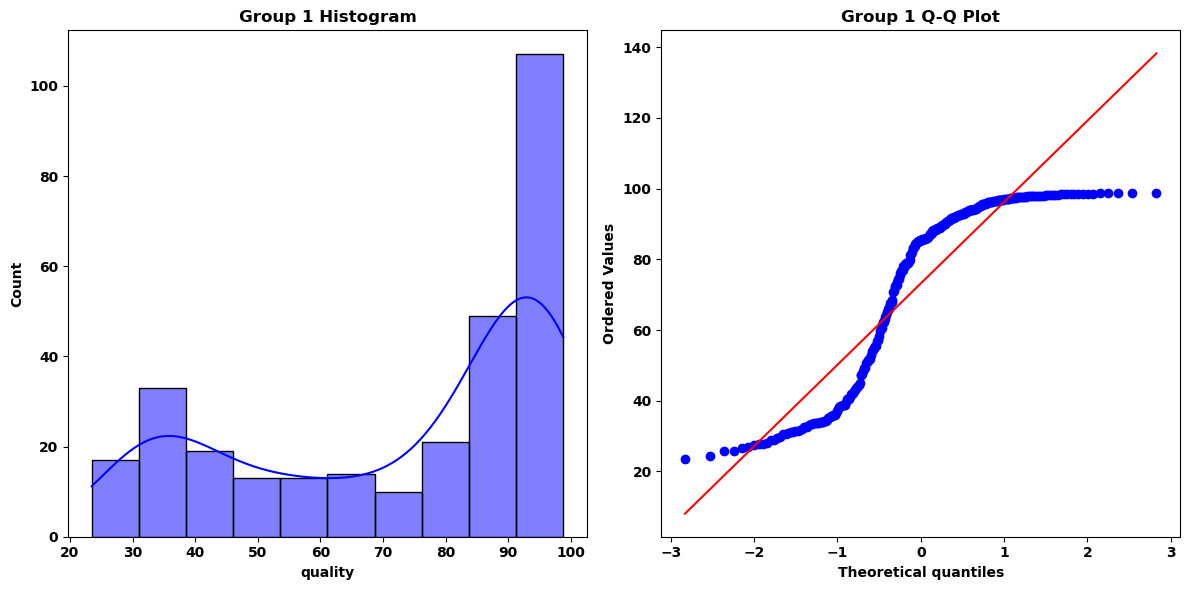

In [28]:
# Check for Normality:
# Use the Shapiro-Wilk test to check if the data follows a normal distribution.

#    Ho(Accepted): Sample is from the normal distributions.(Po>0.05)
#    Ha(Rejected): Sample is not from the normal distributions.

# Perform the Shapiro-Wilk Test
shapiro_group1 = stats.shapiro(back_all_C1['quality'])
print(f"Shapiro-Wilk Test for Group 1: W={shapiro_group1[0]}, p-value={shapiro_group1[1]}")

# Visualize the Data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(back_all_C1['quality'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Group 1 Histogram')

# Q-Q Plot
stats.probplot(back_all_C1['quality'], dist="norm", plot=axes[1])
axes[1].set_title('Group 1 Q-Q Plot')

plt.tight_layout()
plt.show()

In [29]:
# Since the p-value is 5.98e-17 which is less than the alpha(0.05) we reject the null hypothesis i.e. 
# we have sufficient evidence to say that sample does not come from a normal distribution.

# SequenceLogos for internally prenylated proteins with 1 most accessible cysteine

## Sorted by accessibility

In [30]:
# save peptides in txt format for pssmsearch
back_Count_all_1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'back_Count_all_1.txt'), header=None, index=None, sep=' ')
back_Ccount_1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'back_Ccount_1.txt'), header=None, index=None, sep=' ')
back_pae_0['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'back_pae_0.txt'), header=None, index=None, sep=' ')
back_lowest_pae_1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'back_lowest_pae_1.txt'), header=None, index=None, sep=' ')
back_all_C1['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'accessible', 'back_all_C1.txt'), header=None, index=None, sep=' ')

In [31]:
print('back_Count_all_1:', len(back_Count_all_1))
print('back_Ccount_1:', len(back_Ccount_1))
print('back_pae_0:', len(back_pae_0))
print('back_lowest_pae_1:', len(back_lowest_pae_1))
print('back_all_C1:', len(back_all_C1))

back_Count_all_1: 65
back_Ccount_1: 8
back_pae_0: 161
back_lowest_pae_1: 63
back_all_C1: 296


## Sorted by secondary structure

In [32]:
# Define the list of structures for filtering
structure_groups = ['BEND', 'HELX', 'STRN', 'TURN', 'unstructured']

# Iterate over the list of structures to create df outputs

# All background proteins with exactly 1 most accessible cysteine
for structure in structure_groups:
    exec(f"{structure}_back_intern_pep = back_all_C1[back_all_C1['structure_group'] == '{structure}'].reset_index(drop=True)")

In [33]:
print('Back: BEND', len(BEND_back_intern_pep),', HELX', len(HELX_back_intern_pep), ', STRN', len(STRN_back_intern_pep),
      ', TURN', len(TURN_back_intern_pep), ', unstructured', len(unstructured_back_intern_pep))


Back: BEND 22 , HELX 115 , STRN 34 , TURN 17 , unstructured 108


In [34]:
# save peptides in txt format for pssmsearch
BEND_back_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'BEND_back_intern_pep.txt'), header=None, index=None, sep=' ')
HELX_back_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'HELX_back_intern_pep.txt'), header=None, index=None, sep=' ')
STRN_back_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'STRN_back_intern_pep.txt'), header=None, index=None, sep=' ')
TURN_back_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'TURN_back_intern_pep.txt'), header=None, index=None, sep=' ')
unstructured_back_intern_pep['pep'].to_csv(os.path.join(PSSMSearch, 'structure', 'unstructured_back_intern_pep.txt'), header=None, index=None, sep=' ')

# Search for double prenylated cysteines

In [35]:
# Proteins with 2 most accessible cysteines in close proximity

back_accs_2 = agg_back_intern_accs[(agg_back_intern_accs['pepC'].isna()) & (agg_back_intern_accs['accs_count'] == 2)].reset_index(drop=True)
back_accs_2

,ID,name,quality,structure_group,Ccount,Count_all,nAA_30_180_pae,len,Cpos,N_Cpos,pep,pepCCC,pepCC,pepCXC,pepC,lowest_pae,accs_count
0,P61073,CXCR4,NaN,HELX,5,9,3,352,"[-133, -57]","[296, 220]","[ILSCYCIIISK, AFFHCCLNPIL]",NaN,[AFFHCCLNPI],[ILSCYCIII],NaN,3,2
1,Q14061,COX17,NaN,HELX,2,6,3,63,"[-40, -41]","[24, 23]","[PLKPCCACPET, KPLKPCCACPE]",NaN,PLKPCCACPE,NaN,NaN,3,2
2,Q9NSD7,RL3R1,NaN,"[unstructured, BEND]",12,14,1,469,"[-269, -268]","[201, 202]","[GRGDCCGRSLG, HGRGDCCGRSL]",NaN,GRGDCCGRSL,NaN,NaN,1,2
3,Q9BRK5,CAB45,NaN,unstructured,2,2,1,362,"[-342, -341]","[21, 22]","[GLAPCCLWLLG, IGLAPCCLWLL]",NaN,GLAPCCLWLL,NaN,NaN,1,2
4,O43491,E41L2,NaN,unstructured,9,9,1,1005,"[-140, -139]","[866, 867]","[PQIICCSEPPV, LPQIICCSEPP]",NaN,PQIICCSEPP,NaN,NaN,1,2
5,O00519,FAAH1,NaN,HELX,16,16,1,579,"[-560, -559]","[20, 21]","[VALACCFVAAA, GVALACCFVAA]",NaN,VALACCFVAA,NaN,NaN,1,2
6,P07858,CATB,NaN,unstructured,5,17,1,339,"[-331, -330]","[9, 10]","[WASLCCLLVLA, LWASLCCLLVL]",NaN,WASLCCLLVL,NaN,NaN,1,2
7,O14745,NHRF1,NaN,STRN,5,5,1,358,"[-344, -343]","[16, 15]","[LPRLCCLEKGP, PLPRLCCLEKG]",NaN,LPRLCCLEKG,NaN,NaN,1,2


In [36]:
# Proteins with 3 most accessible cysteines in close proximity

back_accs_3 = agg_back_intern_accs[(agg_back_intern_accs['pepC'].isna()) & (agg_back_intern_accs['accs_count'] == 3)].reset_index(drop=True)
back_accs_3

,ID,name,quality,structure_group,Ccount,Count_all,nAA_30_180_pae,len,Cpos,N_Cpos,pep,pepCCC,pepCC,pepCXC,pepC,lowest_pae,accs_count
